# In this code I will calculate the PS of the cmb map obtained by cls made by CAMB

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))

In [3]:
sys.path.insert(0,camb_path)

In [4]:
import camb
from camb import model, initialpower

Set a new parameters for CAMB
I use the parameters 68% intervals for base $\Lambda CDM$ model for Planck power spectra, and combination with CMB lensing reconstruction and BAO. It can be found in arXiv:1807.06209

In [5]:
pars=camb.CAMBparams()
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, mnu=0.06, omk=0.001, tau=0.0561)
pars.InitPower.set_params(As=2.105e-9, ns=0.9665, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

Calculate results for this parameters

In [6]:
results = camb.get_results(pars)

In [7]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


Plot the total lensed CMB power spectra 

In [8]:
#The cls
totCL=powers['total']
#shape
print(totCL.shape)

(2551, 4)


Shape of $\ell $ array

In [9]:
ls = np.arange(totCL.shape[0])
print(ls.shape)
print(ls)

(2551,)
[   0    1    2 ... 2548 2549 2550]


Text(0.5, 1.0, 'PS of the cmb by camb with Planck 2018 parameters')

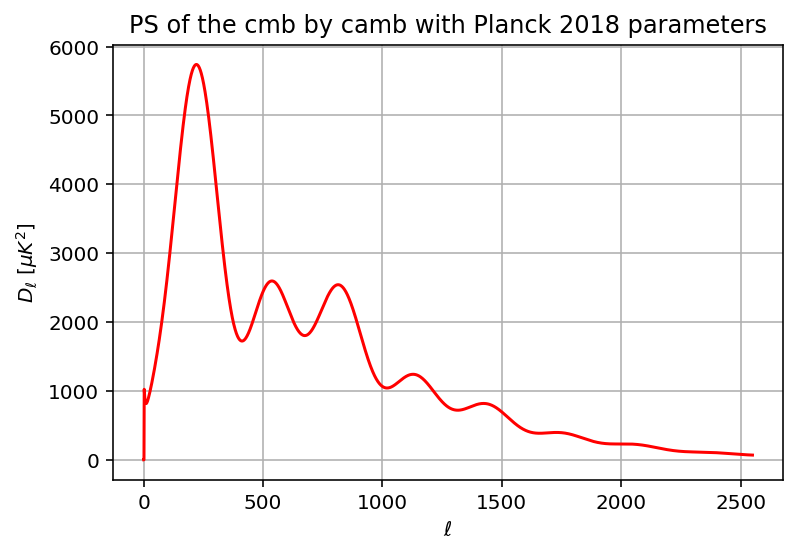

In [10]:

plt.plot(ls, totCL[:,0], color = 'r')
plt.xlabel('$\ell$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.grid()
plt.title('PS of the cmb by camb with Planck 2018 parameters')

# In this second step, I am going to create a cmb map for this $\C_ls$ using the healpy routine $\synfast$

In [11]:
import healpy as hp

Resolution nside = 2048


In [20]:
lmax = 2500
nside=2048
mapa_cl = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))


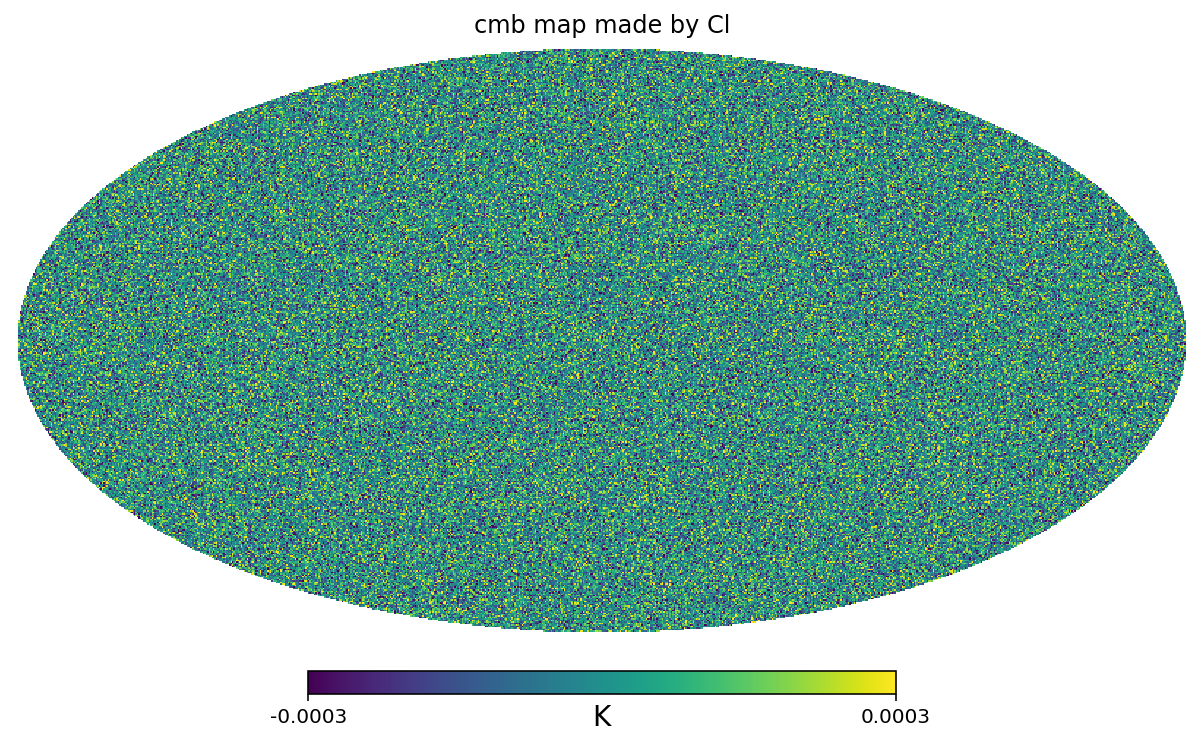

In [21]:
hp.mollview(mapa_cl*(1e-8), title = 'cmb map made by Cl', unit = 'K', min=-3e-4, max=3e-4)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 2.00000e+00, 2.00000e+00, 5.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 5.00000e+00, 4.00000e+00, 2.00000e+00,
        2.00000e+00, 4.00000e+00, 5.00000e+00, 3.00000e+00, 6.00000e+00,
        7.00000e+00, 6.00000e+00, 6.00000e+00, 8.00000e+00, 1.00000e+01,
        8.00000e+00, 7.00000e+00, 1.50000e+01, 1.30000e+01, 1.40000e+01,
        1.60000e+01, 2.80000e+01, 2.10000e+01, 2.30000e+01, 2.70000e+01,
        2.80000e+01, 2.80000e+01, 3.30000e+01, 4.20000e+01, 3.80000e+01,
        4.20000e+01, 5.40000e+01, 5.30000e+01, 7.50000e+01, 5.10000e+01,
        5.60000e+01, 8.10000e+01, 9.10000e+01, 6.80

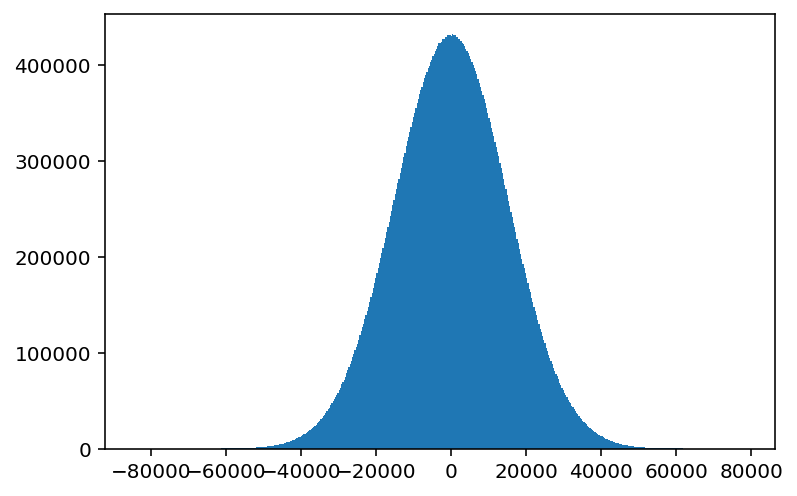

In [53]:
plt.hist(mapa_cl, bins= 500)

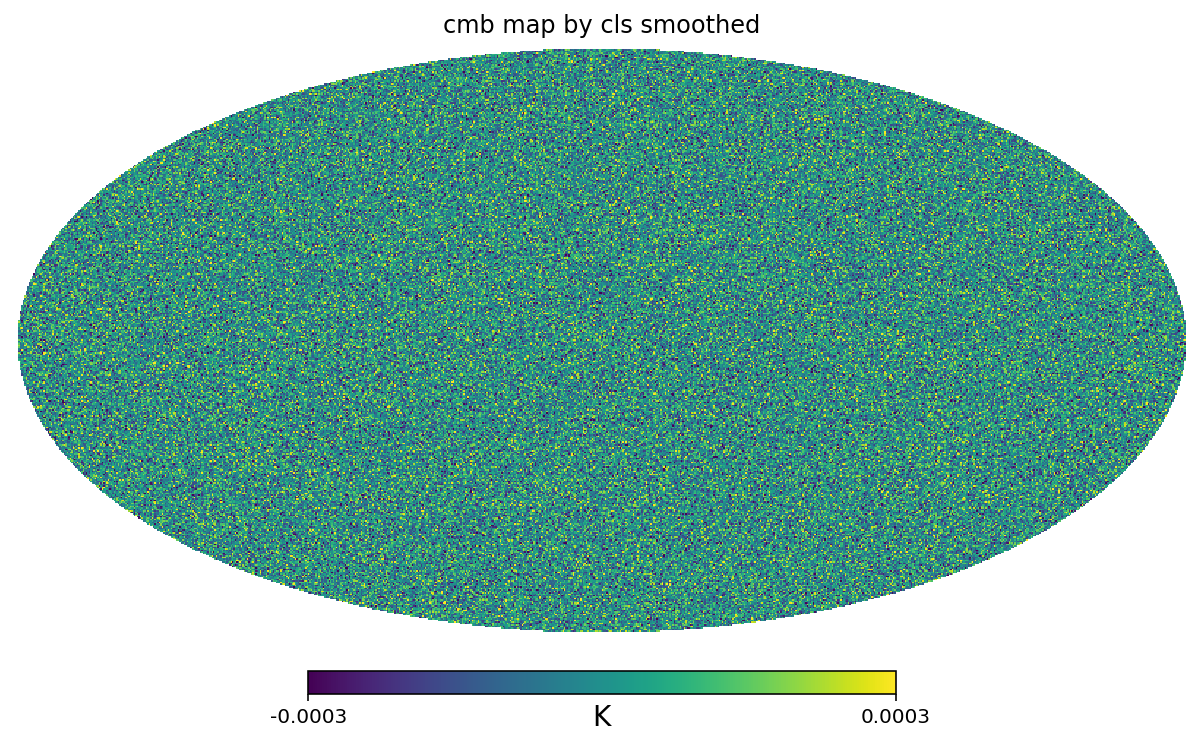

In [22]:
mapa_cl_smoothed=hp.smoothing(mapa_cl, fwhm=np.radians(5/60))
hp.mollview(mapa_cl_smoothed*(1e-8), title = "cmb map by cls smoothed", min = -3e-4, max = 3e-4, unit = 'K')

We compute the cls with the healpy routine anafast and we plot the results, so we compare the spectrum with camb

In [23]:
lmax = 2500
cl=hp.anafast(mapa_cl_smoothed, lmax=lmax)
ell=np.arange(len(cl))

In [24]:
print(cl)
print(ell)

[5.94413390e-11 1.92812101e-11 1.08684367e+03 ... 6.77441346e-01
 6.56971141e-01 6.76871808e-01]
[   0    1    2 ... 2498 2499 2500]


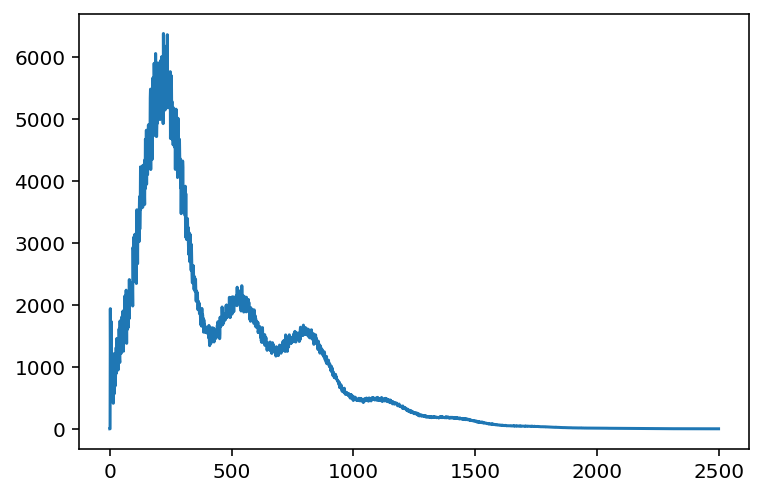

In [19]:
plt.plot(ell, cl)


I am going to binned the results following $\Delta l = 5$ for $0 \ \leq  l \ \leq 99$ obtained of Planck 2018 results

In [ ]:
I am going to binned results following $\Lambda l =

In [31]:
# We define a function to bin the ls
# It depends of the ell, cl, sums
def binsdata(ell,cl, sums):
    #bins=100 # we define the bins like a ratio between len(y) and the sums
    bins=int(len(ell)/sums)
# Python counst from 0
# we made four arrays to equal to 0

    cln=np.zeros(bins-1) 
    ln=np.zeros(bins-1)
   # lndis=np.zeros(bins-1)
    #yndis=np.zeros(bins-1)
    
    for i in range(bins-1):
        ln[i]=np.mean(ell[sums*i:sums*(i+1)]) # :from i to i=i+1
        cln[i]=np.mean(cl[sums*i:sums*(i+1)])
       # lndis[i]=np.std(l_s[sums*i:sums*(i+1)])
       # yndis[i]=np.std(y[sums*i:sums*(i+1)])
    return(ln,cln) 

I am going to binned the results following  Δ𝑙=5  for  0 ≤𝑙 ≤99, Δ𝑙=9  for  100 ≤𝑙 ≤1500, Δ𝑙=17  for 1500 ≤𝑙 ≤2013, Δ𝑙=33  for  2014 ≤𝑙 ≤2500 obtained of Planck 2018 results

In [76]:
ln1,cln1=binsdata(ell[0:99],cl[0:99],5)
Bl1=hp.gauss_beam(fwhm=np.radians(5.0/60.0), lmax=99, pol = False)

ln2,cln2=binsdata(ell[100:1500],cl[100:1500],9)
ln3,cln3=binsdata(ell[1501:2013],cl[1501:2013],17)
ln4,cln4=binsdata(ell[2014:2500],cl[2014:2500],33)
Lntotal=np.concatenate([ln1,ln2,ln3,ln4])
Clntotal=np.concatenate([cln1*Bl1**2,cln2,cln3,cln4])


ValueError: operands could not be broadcast together with shapes (18,) (100,) 

In [66]:
Clntotal=np.concatenate([cln1,cln2,cln3,cln4])

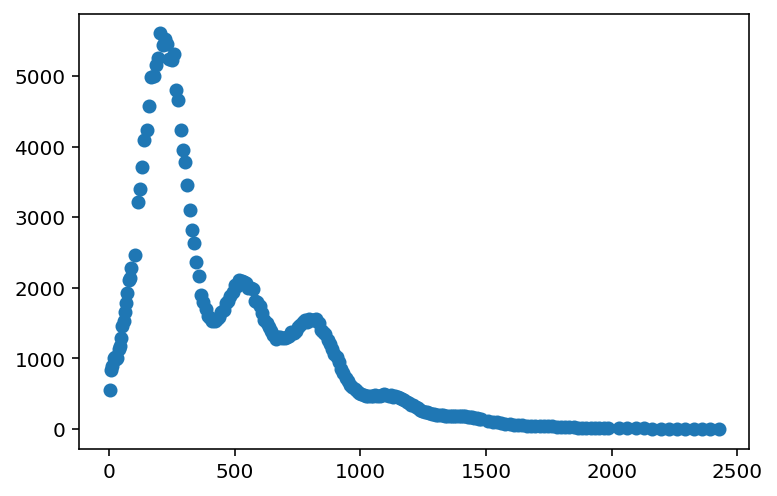

In [69]:
plt.scatter(Lntotal,Clntotal)

We compare the two plots with cosmic variance

/tmp/ipykernel_26157/1181543442.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.errorbar(Lntotal, Clntotal, yerr=yerr, xerr=None, fmt = 'go', color = 'b', label = 'Cl obtained by a camb map')


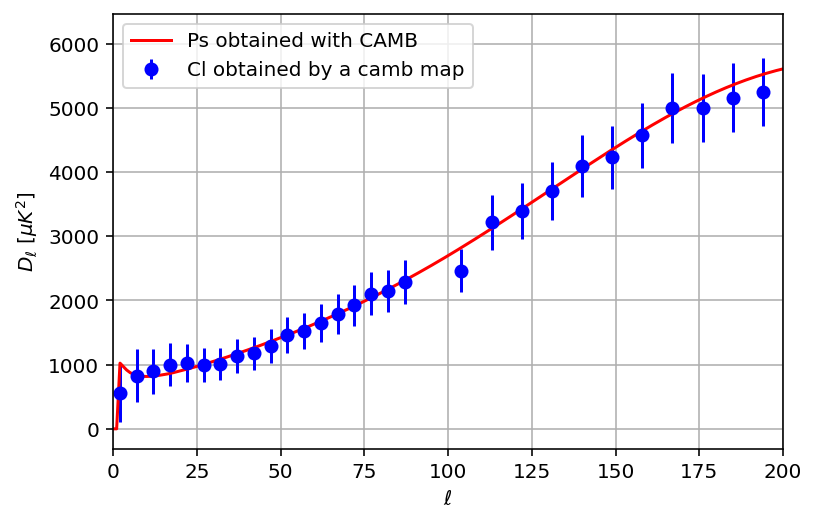

In [73]:
#errors bars cosmic variance
yerr=np.sqrt(2.0/(Lntotal+1))*Clntotal
plt.errorbar(Lntotal, Clntotal, yerr=yerr, xerr=None, fmt = 'go', color = 'b', label = 'Cl obtained by a camb map')
plt.plot(ls, totCL[:,0], color = 'r', label ='Ps obtained with CAMB')
plt.xlim(0,200)
plt.xlabel('$\ell$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend()

I Computes the spherical transform of an axisimmetric gaussian beam now 

In [74]:
Bl=hp.sphtfunc.gauss_beam(fwhm=np.radians(5.0/60.0), lmax=2499, pol = False)

In [75]:
Clntotal*Bl**2

ValueError: operands could not be broadcast together with shapes (214,) (2500,) 